# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [1]:
! git clone https://github.com/katiehutc/scratchpad
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()


Cloning into 'scratchpad'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 33 (delta 7), reused 5 (delta 5), pack-reused 22 (from 1)
Receiving objects: 100% (33/33), 39.51 KiB | 1.58 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Download complete
Extracting data files...
Data extracted


Part 1:

In [ ]:
import pandas as pd

df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding="latin1")
# replaced commas with empty string
df["Price_clean"] = df["Price"].str.replace(",", "", regex=False)

# stripped the leading and trailing white spaces
df["Price_clean"] = df["Price_clean"].str.strip()

# converted string to number and changed empty strings to NaN
df["Price_clean"] = pd.to_numeric(df["Price_clean"], errors="coerce")

# count number of missing values
num_missing = df["Price_clean"].isna().sum()
print(df["Price"].str.contains(",", na=False).sum())
print("There are " + str(num_missing) + " missing values")


181
There are 0 missing values


Before formatting, 181 values had commas. After removing commas and converting the Price variable to numeric, there were no missing values. This indicates that all the numbers had valid price entries once formatting issues were resolved.

Part 2:

In [ ]:
import pandas as pd

df = pd.read_csv("/content/data/mn_police_use_of_force.csv", encoding="latin1")

# inspect column
print(df["subject_injury"].value_counts(dropna=False))

# strip white spaces and use title case
df["subject_injury"] = df["subject_injury"].str.strip().str.title()

#set non yes/no values to Missing label
df.loc[
    ~df["subject_injury"].isin(["Yes", "No"]),
    "subject_injury"
] = "Missing"

# get proportion of missing values
prop_missing = (df["subject_injury"] == "Missing").mean()
print(f"{prop_missing * 100:.2f}% missing values")

#compare force with injury
pd.crosstab(
    df["force_type"],
    df["subject_injury"],
    dropna=False
)


subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
76.19% missing values


subject_injury,Missing,No,Yes
force_type,,,
Baton,2,0,2
Bodily Force,7051,1093,1286
Chemical Irritant,1421,131,41
Firearm,0,2,0
Gun Point Display,27,33,44
Improvised Weapon,74,34,40
Less Lethal,87,0,0
Less Lethal Projectile,0,1,2
Maximal Restraint Technique,170,0,0


After cleaning the values in the subject_injury column, I found that 76.19% of the values were missing. This was done by calculating the number of missing values divided by the total values.

After that, I compared the subject_injury column with the force type column using the crosstab tool. Through this, you can see that for bodily force, chemical irritant, improvised weapon, less lethal, maximal restraint technique, police K9 bite, and taser, the missing values were much higher. These are almost all of the categories. This may indicate that police don't report subject injury as much when they use force.

Part 3:

In [ ]:
import pandas as pd

df = pd.read_csv("/content/data/metabric.csv", encoding="latin1")
print(df["Overall Survival Status"].value_counts())

# convert to binary
df["Overall Survival Status"] = df["Overall Survival Status"].map({
    "1:DECEASED": 0,
    "0:LIVING": 1
})

print(df["Overall Survival Status"].value_counts())


Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64
Overall Survival Status
0    768
1    575
Name: count, dtype: int64


Here, I converted deceased patients to 0 and alive patients to 1 by mapping the variables.

Part 4:

In [ ]:
import pandas as pd

df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding="latin1")

# inspect column
# print(df["Review Scores Rating"].value_counts(dropna=False))

# count number missing
num_missing = df["Review Scores Rating"].isna().sum()
print(f"missing: {num_missing}")

# compute median
median = df["Review Scores Rating"].median()
print(f"median: {median}")

# impute
df["Review_Scores_Replace"] = df["Review Scores Rating"].fillna(median)
print(df["Review_Scores_Replace"].isna().sum())

# median after
median = df["Review Scores Rating"].median()
print(f"media after: {median}")

missing: 8323
median: 94.0
0
media after: 94.0


In this column, I found 8323 missing values. Then, I imputed by filling in the missing values with the median (94). Doing so can assume that the missing values were around the median value, and this is an incorrect assumption. There's no way to know what all the missing values, and this technique reduces the variability and doesn't reflect the true variation in the data. Additionally, if the values are missing for a reason for a purposeful reason, doing this technique can hide these reasons.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

Year
1940.0     24
1941.0     27
1942.0     41
1943.0     28
1944.0     31
         ... 
2022.0     98
2023.0    109
2024.0     52
2025.0     66
2026.0     12
Name: count, Length: 87, dtype: int64


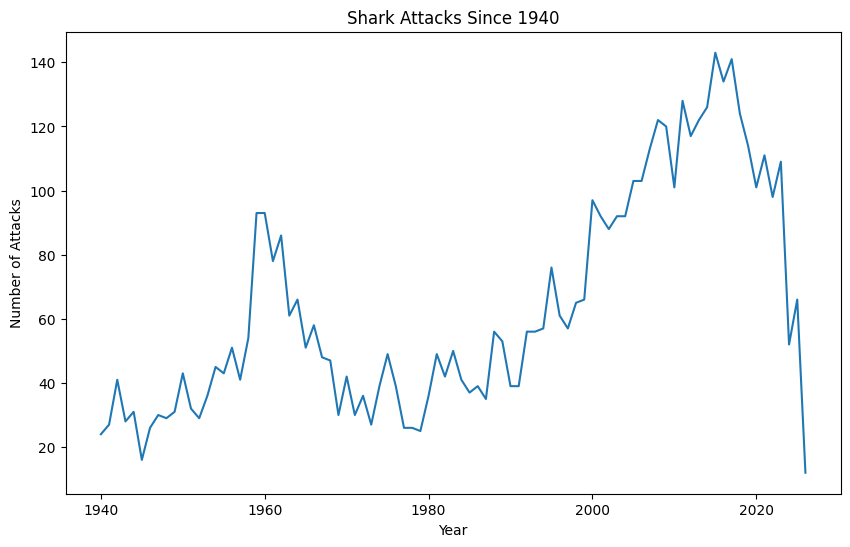

0     13
1      ?
2      ?
3     39
4     11
5     27
6     12
7     26
8      ?
9     56
10     ?
11     ?
12    55
13     ?
14    24
15    26
16    25
17    61
18    40
19     ?
Name: Age, dtype: object
object
['13' '?' '39' '11' '27' '12' '26' '56' '55' '24' '25' '61' '40' '14'
 '50+' '54' '48' '57' '8' '63']


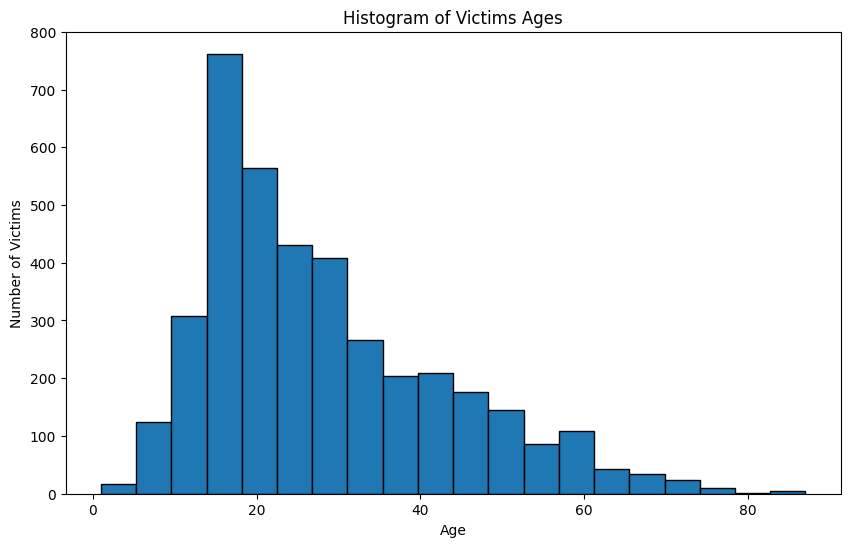

Type
Unprovoked    5226
Unknown       1204
Provoked       644
Name: count, dtype: int64
Proportion of attacks that are unprovoked: 73.88%
Fatal Y/N
N          4942
Y          1489
Unknown     643
Name: count, dtype: int64
Fatal Y/N      N  Unknown     Y
Type                           
Provoked     614        9    21
Unknown      449      555   200
Unprovoked  3879       79  1268


In [ ]:
import pandas as pd

# I used read_excel instead of read_csv because it's an xls file
df = pd.read_excel('/content/data/GSAF5.xls')

# I did not see any columns with no data. I'm not sure if this is correct or not, but looking at each column, they are all filled out.

"""  An observation I noticed is that some of the 'Species' column is empty, unknown, and takes in many different types of values.
For example, some of them say '1.7m Seven Gill shark', 'Great White Shark', 'Bronze whaler?', or even 'Great White Shark est 3m (10ft)'.
Because the variables are so different, I wouldn't directly try to compare the data by species (whether that be through simple analysis
or visualization) because the the species descriptions are so varied. I wouldn't be able to compare by species directly by say singling
out 'Great White Sharks'.

Another observation is some of the ages are put as '?', so if I ever needed to analyze the ages I would have to be aware that some of the
values are '?' if I wanted to convert the values to integers.
"""

df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Year"].describe()

""" The values in the 'Year' category range from 0 to 2026. The 0 indicates that either no date was listed or that it was before date x (varied).
Half of the date values are before 1987 and half of the date values are after. Because some of the dates are 0, the mean is not accurate.
"""

# This calculates the number of attacks per year since 1940
df_after_1940 = df[df["Year"] >= 1940]
attacks_per_year = df_after_1940["Year"].value_counts().sort_index()
print(attacks_per_year)

# This is a simple plot of the shark attacks since 1940 to visualize if there are any trends.
import matplotlib.pyplot as plt
attacks_per_year.plot(kind="line", figsize=(10,6))
plt.title("Shark Attacks Since 1940")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()
""" From the visualization, the number of shark attacks per year has increased, but not steadily.
In 1940, there were 24 shark attacks and it rose to a peak in the 1960s and then fell again.
Then again, the number of attacks rose in the 2000s, reaching a peak in the late 2010s and is now
falling again. With each decade, there are increases and decreases in the number of attacks.
However, we are able to see 2 clear peaks in the graph.
"""

# Inspect age variable for outliers
print(df["Age"].head(20))
print(df["Age"].dtype)
print(df["Age"].unique()[:20])

 # Clean the age variable, since many values have '?', turning invalid entries into NaN
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Plot histogram of the age
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df["Age"].dropna(), bins=20, edgecolor='black')
plt.title("Histogram of Victims Ages")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.show()


# Clean the 'Type' column
df["Type"].value_counts(dropna=False)
df["Type"] = df["Type"].str.strip().str.title()
# Convert values
df.loc[~df["Type"].isin(["Provoked", "Unprovoked"]), "Type"] = "Unknown"
# Number of values in each category
print(df["Type"].value_counts())
# Proportion of attacks that are unprovokes
unprovoked = (df["Type"] == "Unprovoked").mean()
print(f"Proportion of attacks that are unprovoked: {unprovoked:.2%}")

# Clean the fatal Y/N column
df["Fatal Y/N"].value_counts(dropna=False)
df["Fatal Y/N"] = df["Fatal Y/N"].str.strip().str.upper()
df.loc[~df["Fatal Y/N"].isin(["Y", "N"]), "Fatal Y/N"] = "Unknown"
print(df["Fatal Y/N"].value_counts())

# Compare fatal column with provoked column
fatal_by_type = pd.crosstab(df["Type"], df["Fatal Y/N"])
print(fatal_by_type)

"""
Provoked attacks are less likely to be fatal (614 non-fatal compared to 21 fatal), while unprovoked attacks were
more likely to be fatal than provoked attacks (3879 non-fatal compared to 1268 fatal). This makes sense because
if the sharks were provoked, they would probably try to get away from the humans, resulting in less fatal attacks.
However, if the sharks were unprovoked, that means they seeked out the humans themselves, and were probably looking
to attack. This is why the comparative amount of fatal vs non-fatal was higher for unprovoked attacks.

"""

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about how to tidy datasets, which makes the data much easier for data analysis. When you tidy data, it has each observation as a row, each variable as a column, and each observational unit as a table.
2. The "Tidy Data Standard" is intended to make tiding data more easily and efficiently, as you do not need to restart every time. This is done through tools that allow you to input data easily.
3.  "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." means that each tidy dataset is clean and ready to be analyzed. There are no further steps needed to clean missing or weird values. However, each messy dataset can be messy differently. You could have missing values as blanks, "?", "Unknown", or any other value. Some variables could be strings when you want it to be an integer. There are many ways for a dataset to be messy, while clean datasets are just clean. The second quote, "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general," means that you can tell which things are observations (the data itself) or if it's a variable (the categories), however, it is difficult to define them. This could be because observations are related or hierarchical. For example, in the shark dataset, the name/sex/age are all related to the individual who was attacked, but the species relates to the shark. In this way, it can be difficult to figure out the relationships these observations and variables.
4. Values are defined as either numbers or strings, depending on if the data is quantitative or qualitative. Variables are defined as a category that contains all values that are measured under a single underlying attribute. Observations are defined as all the values measures on the same unit across these different attributes.
5. "Tidy Data" is defined as a standard way of mapping the meaning of a dataset to its structure. This depends on the matching between the columns and tables with the observations, variables, and types.
6. The 5 most common problems with messy datasets are: comlumn headers as values, multiple variables in one column, variables on both rows and columns, multiple types of observational units in the same table, and a single unit being stores in multiple tables. The data in table 4 is messy because there should only have the variables religion, income, and frequency as columns, but instead they're rows. To "melt" a dataset means to tidy it and it is parameterizsed by colvars, which is a list of columns that are already variables.
7. Table 11 is messy because the variables are being stored in both the rows and columns. Table 12 is tidy and molton because the missing values were dropped and the element variable is molton. This allows for one variable in each column and each row to represent one day.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

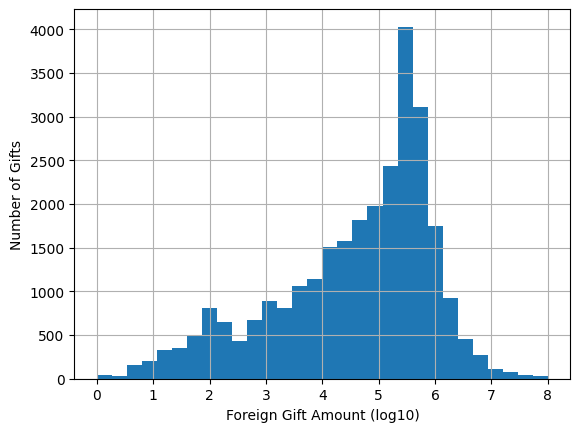

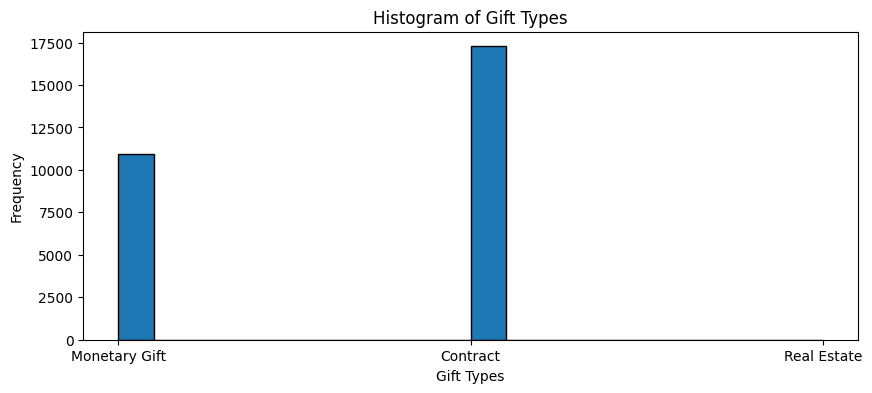

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Top 15 Countries by Gift Count:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64
Top 15 Countries by Gift Amount:
Country of Giftor
QATAR                   2.706241e+09
ENGLAND                 1.464934e+09
CHINA                   1.237952e+09
SAUDI ARABIA            1.065206e+09
BERMUDA                 8.995940e+08
CANADA                  8.981607e+08
HONG KONG               8.874025e+08
JAPAN                   6.563255e+08
SWITZERLAND             6.198994e+08
INDIA                   5.395565e+08
GERMANY                 4.424844e+08
U

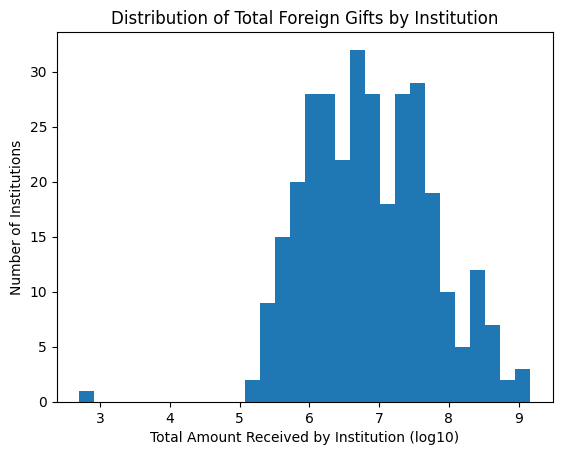

Top Giftors Total
Giftor Name
Qatar Foundation                       1.166504e+09
Qatar Foundation/Qatar National Res    7.961970e+08
Qatar Foundation for Education         3.739452e+08
Anonymous                              3.387936e+08
Saudi Arabian Cultural Mission         2.752215e+08
HCL                                    1.900000e+08
Church of Jesus Christ of LDS          1.852037e+08
Emirates Institute for Advanced Sc     1.706412e+08
QIC                                    1.483555e+08
Anonymous #9                           9.633500e+07
Qatar National Research Fund           7.902170e+07
Government of Saudi Arabia             7.519243e+07
Contracting Party                      6.999698e+07
CMKL University                        6.770000e+07
Royal Embassy of Saudi Arabia          6.706249e+07
Name: Foreign Gift Amount, dtype: float64


In [32]:
import pandas as pd

df = pd.read_csv('/content/data/ForeignGifts_edu.csv', encoding="latin1")

# print(df["Foreign Gift Amount"].describe())

import numpy as np

# scaled the data by log10 the gift amounts because the graph was very skewed left
df["Foreign Gift Amount"] = df["Foreign Gift Amount"].where(df["Foreign Gift Amount"] > 0)
np.log10(df["Foreign Gift Amount"]).hist(bins=30)
plt.xlabel("Foreign Gift Amount (log10)")
plt.ylabel("Number of Gifts")

"""
The histogram of the 'Foreign Gift Amount' category shows that most of the gift amounts were between
log10 = 5 and log10 = 6. These values translate to 100K to 1M range. Additionally, the smaller size
gifts are less frequent and the extremely large gifts are less frequent as well. These large gifts
create a long tail on the right side of the distribution. The log transformation was used to better
visualize the distribution.
"""

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(df["Gift Type"].dropna(), bins=20, edgecolor='black')
plt.title("Histogram of Gift Types")
plt.xlabel("Gift Types")
plt.ylabel("Frequency")
plt.show()

print(df["Gift Type"].value_counts())

"""
The histogram of the 'Gift Type' category shows that almost all of the gifts are either
contract or monetary gifts. Compared to contract with 17274 and monetary with 10936,
real state gifts only tally to 11. This is why the bar for real estate gifts is so small.
"""

print(f"Top 15 Countries by Gift Count:")
print(df["Country of Giftor"].value_counts().head(15))

print(f"Top 15 Countries by Gift Amount:")
print(df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))

print(f"Top 15 Institutions by Gift Amount:")
print(df.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))

import matplotlib.pyplot as plt
import numpy as np

institution_totals = df.groupby("Institution Name")["Foreign Gift Amount"].sum()
plt.hist(np.log10(institution_totals[institution_totals > 0]), bins=30)
plt.xlabel("Total Amount Received by Institution (log10)")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gifts by Institution")
plt.show()

print(f"Top Giftors Total")
print(df.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15))





**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?